In [1]:
# IMPORT NUMPY AND PANDAS
import numpy as np
import pandas as pd

In [2]:
# FOR DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# READ CSV
CAP = pd.DataFrame(pd.read_csv(r'C:\Users\Megha\OneDrive\Desktop\carageprice.csv'))

In [4]:
CAP.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
# DATA INSPECTION
CAP.shape

(112, 2)

In [6]:
CAP.columns

Index(['Year', 'Price'], dtype='object')

In [7]:
CAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
CAP.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
# CHECKING FOR NULL VALUES 
CAP.isnull().sum()


Year     0
Price    0
dtype: int64

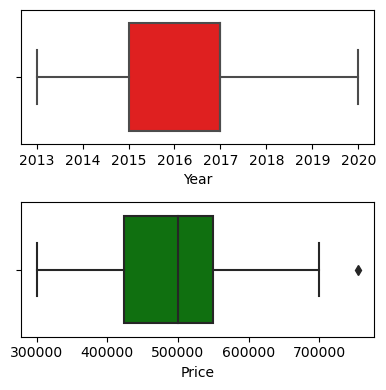

In [10]:
# OUTLINER ANALYSIS
fig, axs = plt.subplots(2, figsize = (4,4))
plt1 = sns. boxplot(x = CAP['Year'], ax = axs[0], color = 'r')
plt2 = sns. boxplot(x = CAP['Price'], ax = axs[1], color = 'g')
plt.tight_layout()

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
# MODEL BUILDING
feature_x = ['Year']
X = CAP[feature_x]
y = CAP.Price

In [13]:
# SPLITING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# TRAIN DATA SET
X_train.head()

,Year
66,2017
90,2017
62,2017
22,2015
85,2015


In [15]:
y_train.head()

66    525000
90    520000
62    540000
22    434999
85    320000
Name: Price, dtype: int64

In [16]:
# BUILDING LINEAR REGRESSION MODEL
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_linear = linear_model.predict(X_test)

In [18]:
# BUILDING LASSO REGRESSION
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [19]:
y_pred_lasso = lasso_model.predict(X_test)

In [20]:
# CALCULATING ROOT MEAN SQUARE ERROR
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [21]:
rmse_linear = np.sqrt(mse_linear)
rmse_lasso = np.sqrt(mse_lasso)


In [22]:
print("Linear Regression RMSE:", rmse_linear)
print("Lasso Regression RMSE:", rmse_lasso)

Linear Regression RMSE: 65779.22359552195
Lasso Regression RMSE: 65778.8702473345


In [25]:
# FINDING OUT THE BEST MODEL
if rmse_linear < rmse_lasso:
    best_model = "Linear Regression"
else:
    best_model = "Lasso Regression"

print("RMSE for Linear Regression:", rmse_linear)
print("RMSE for Lasso Regression:", rmse_lasso)
print("Best Model:", best_model)

RMSE for Linear Regression: 65779.22359552195
RMSE for Lasso Regression: 65778.8702473345
Best Model: Lasso Regression


In [26]:
# PREDICTING THE PRICE OF 2022 MODEL CAR 

X_new = pd.DataFrame({'Year':[2022]})
                 
# Make predictions using the Linear Regression model
y_pred_linear = linear_model.predict(X_new)

# Make predictions using the Lasso Regression model
y_pred_lasso = lasso_model.predict(X_new)

print("Predicted 2022 price using Linear Regression:", y_pred_linear[0])
print("Predicted 2022 price using Lasso Regression:", y_pred_lasso[0])

Predicted 2022 price using Linear Regression: 743601.6159450412
Predicted 2022 price using Lasso Regression: 743599.3742714375
